## **Task 2 Decision Trees for Human Activity Recognition**

### **Question 1**  
(i) Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [1]:
pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00


In [2]:
# Initialization
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
import os

In [3]:
total_acc_data = []
total_features = []
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

# Train data
com_data_dir_train = "/content/drive/MyDrive/Task_2/Combined/Train"
X_train = []
y_train = []

for folder in folders:
    folder_path = os.path.join(com_data_dir_train, folder)

    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values.flatten())  # Flatten each sample to convert to 2D
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

# Test data
com_data_dir_test = "/content/drive/MyDrive/Task_2/Combined/Test"
X_test = []
y_test = []

for folder in folders:
    folder_path = os.path.join(com_data_dir_test, folder)

    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values.flatten())  # Flatten each sample to convert to 2D
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(126, 1500)
(126,)
(54, 1500)
(54,)


In [4]:
# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier()


# Train the model using the provided features from the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

In [5]:

# Calculate accuracy, precision, and recall of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Compute the confusion matrix to see where the model got confused
conf_matrix = confusion_matrix(y_test, y_pred)

In [6]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.6852
Precision: 0.7202
Recall: 0.6852
Confusion Matrix:
[[4 3 1 0 1 0]
 [1 5 0 0 3 0]
 [1 2 3 1 2 0]
 [0 0 0 7 2 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


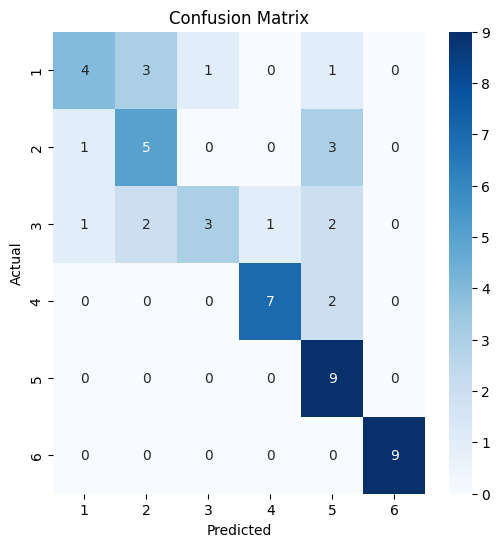

In [7]:
# Plot and display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

(ii) Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [9]:
# Load the accelerometer data for the X, Y, and Z axes for the training set
acc_x_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
acc_y_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
acc_z_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Load the activity labels for the training set
y_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)

# Load the accelerometer data for the X, Y, and Z axes for the test set
acc_x_test = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None)
acc_y_test = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None)
acc_z_test = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)

# Load the activity labels for the test set
y_test = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)

/tmp/ipython-input-1319070512.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  acc_x_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-1319070512.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  acc_y_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-1319070512.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  acc_z_train = pd.r

In [10]:
# Combine the accelerometer data from the X, Y, and Z axes into one feature set for training
X_train = np.hstack((acc_x_train, acc_y_train, acc_z_train))

# Combine the accelerometer data from the X, Y, and Z axes into one feature set for testing
X_test = np.hstack((acc_x_test, acc_y_test, acc_z_test))

# Get the configuration of features to be extracted from the time series data
cfg = tsfel.get_features_by_domain()

# Extract features from the training set time series data using TSFEL
X_train_features = tsfel.time_series_features_extractor(cfg, X_train)

# Extract features from the test set time series data using TSFEL
X_test_features = tsfel.time_series_features_extractor(cfg, X_test)

/tmp/ipython-input-2452549974.py:11: UserWarning: Using default sampling frequency set in configuration file.
  X_train_features = tsfel.time_series_features_extractor(cfg, X_train)


/tmp/ipython-input-2452549974.py:14: UserWarning: Using default sampling frequency set in configuration file.
  X_test_features = tsfel.time_series_features_extractor(cfg, X_test)


In [11]:
# Standardize the extracted features (mean=0, variance=1) to improve model performance
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_test_features = scaler.transform(X_test_features)

# Flatten the labels (convert from 2D to 1D array) to match the model's input format
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create a Decision Tree Classifier model
clf = DecisionTreeClassifier()

# Train the model using the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

In [12]:
# Calculate accuracy, precision, and recall of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix to see where the model got confused
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7075
Precision: 0.7090
Recall: 0.7075
Confusion Matrix:
[[297  96  85  10   8   0]
 [107 298  48   4  14   0]
 [110  59 240   5   6   0]
 [  1  25   3 354 108   0]
 [  9  15   4 145 359   0]
 [  0   0   0   0   0 537]]


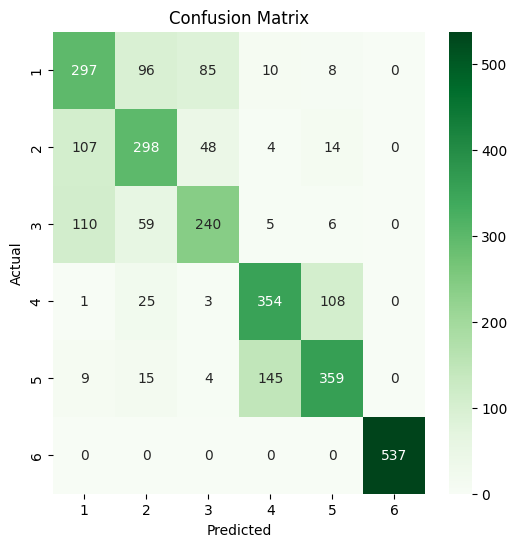

In [13]:
# Plot and display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

(iii) Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [14]:
# Load the provided features for the training set
X_train_provided = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Load the provided features for the test set
X_test_provided = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Load the activity labels for the training set
y_train = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)

# Load the activity labels for the test set
y_test = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)

/tmp/ipython-input-1326176590.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train_provided = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-1326176590.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test_provided = pd.read_csv('/content/drive/MyDrive/Task_2/human+activity+recognition+using+smartphones (2)/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [15]:
# Create a Decision Tree Classifier model
clf_provided = DecisionTreeClassifier()

# Train the model using the provided features from the training data
clf_provided.fit(X_train_provided, y_train)

# Use the trained model to make predictions on the test data
y_pred_provided = clf_provided.predict(X_test_provided)

In [16]:
# Calculate accuracy, precision, and recall of the model's predictions
accuracy = accuracy_score(y_test, y_pred_provided)
precision = precision_score(y_test, y_pred_provided, average='weighted')
recall = recall_score(y_test, y_pred_provided, average='weighted')

# Compute the confusion matrix to see where the model got confused
conf_matrix = confusion_matrix(y_test, y_pred_provided)

In [17]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8643
Precision: 0.8647
Recall: 0.8643
Confusion Matrix:
[[451  24  21   0   0   0]
 [ 69 372  30   0   0   0]
 [ 12  52 356   0   0   0]
 [  0   0   0 375 116   0]
 [  0   0   0  76 456   0]
 [  0   0   0   0   0 537]]


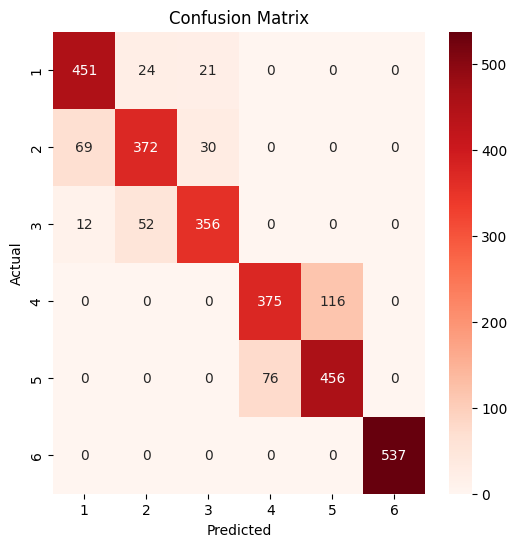

In [18]:
# Plot and display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

(iv)Compare the results of the three models. Which model do you think is better?

Model 3 is clearly the best-performing model.

achieves a significantly higher accuracy of 86.43% compared to Models 1 and 2, which reach around 70.8%.

In addition, both precision and recall are much **higher** in Model 3, indicating that it produces fewer false positives and false negatives.

The confusion matrix further supports this conclusion, as it shows fewer misclassifications and demonstrates **better performance** in distinguishing between different activities.

**Conclusion:**

Considering all key performance metrics and the confusion matrix analysis, **Model 3** clearly outperforms Models 1 and 2 and is the preferred choice for activity recognition.



### **Question 2**

Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree.


In [19]:
# Define the range of tree depths to explore
depths = range(2, 9)
accuracies_raw = []
accuracies_tsfel = []
accuracies_provided = []

# Loop through different tree depths and evaluate the model accuracy for each type of data
for depth in depths:
    # Train a Decision Tree model using raw accelerometer data
    clf_raw = DecisionTreeClassifier(max_depth=depth)
    clf_raw.fit(X_train, y_train)
    accuracies_raw.append(accuracy_score(y_test, clf_raw.predict(X_test)))

    # Train a Decision Tree model using tsfel features
    clf_tsfel = DecisionTreeClassifier(max_depth=depth)
    clf_tsfel.fit(X_train, y_train)
    accuracies_tsfel.append(accuracy_score(y_test, clf_tsfel.predict(X_test)))

    # Train a Decision Tree model using the provided features
    clf_provided = DecisionTreeClassifier(max_depth=depth)
    clf_provided.fit(X_train_provided, y_train)
    accuracies_provided.append(accuracy_score(y_test, clf_provided.predict(X_test_provided)))

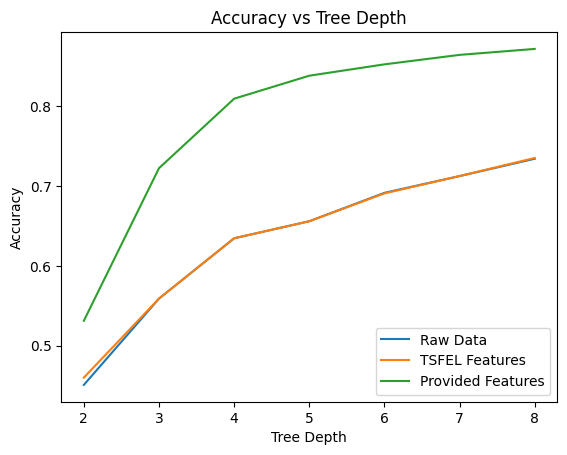

In [20]:
# Plot the accuracy vs. tree depth for each type of data
plt.plot(depths, accuracies_raw, label="Raw Data")
plt.plot(depths, accuracies_tsfel, label="TSFEL Features")
plt.plot(depths, accuracies_provided, label="Provided Features")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Tree Depth')
plt.show()

### **Question 3**

Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

**Model 1 (Raw Accelerometer Data):**

* In this model, WALKING is sometimes classified as WALKING_UPSTAIRS or WALKING_DOWNSTAIRS, while some instances of WALKING_UPSTAIRS are misclassified as WALKING_DOWNSTAIRS.

* In WALKING_DOWNSTAIRS, some samples are misclassified as SITTING.

**Model 2 (TSFEL Features):**

* In this model, out of 471 true instances of WALKING_UPSTAIRS, 107 were misclassified as WALKING.

* In SITTING, 108 instances were misclassified as STANDING. Similarly, in STANDING, 145 instances were misclassified as SITTING.

**Model 3 (Author-provided Features):**

* In this model, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, and LAYING are classified very accurately, with only a few misclassifications.

* However, misclassification between STANDING and SITTING is also observed in this model.

Note: May be the reasone behind this is is the both case we are not moving all the axis are constand.


